## Paired samples t-test using SciPy stats

In [36]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

The paired sample t-test is used to compare measures from a single data source at two points in time, often to test whether an operation on the data source has had a significant effect on the outputs. For example, testing a weight-loss intervention on patients, recording performance on a physical task both before and after the intervention. The test checks if there is a statistically significant difference between the means of the two sets of results.

The paired t-test has four assumptions:
* that the data is numerical or continuous
* that the subjects from which measurements are taken are independent and do not affect each other's measurements
* that the differences between the pairs are normally distributed
* that there are no extreme values in the distribution of pair differences

For this exercise, I will be using data from the US Traffic Fatalities dataset which can be found [here](https://vincentarelbundock.github.io/Rdatasets/csv/AER/Fatalities.csv), comparing fatality data from 48 US states for years 1987 and 1988. The fatality rates are dependent as the data is drawn from the same populations in two time periods. The data is numerical and the subjects (states) are independent of each other, so the dataset satisfies the first two assumptions.

I will first test assumption #3 by looking at the distribution of differences between the two years.

In [4]:
df = pd.read_csv('us-road-fatalities.csv')

df.head()

,State,1987,1988,Difference
0,Alabama,1110,1023,87
1,Arizona,937,944,-7
2,Arkansas,639,610,29
3,California,5504,5390,114
4,Colorado,591,497,94


Text(0, 0.5, 'Frequency')

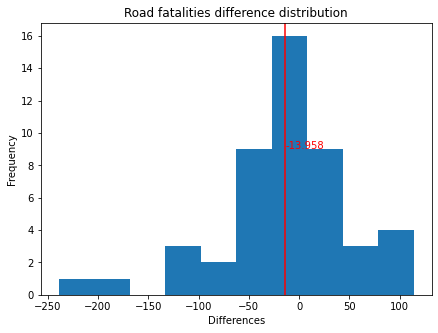

In [24]:
differences = df['Difference']
fig = plt.figure(figsize=(7,5))
plt.hist(differences, bins=10)
plt.axvline(x=np.mean(differences), c='r')
plt.text(np.mean(differences),9, round(np.mean(differences),3),c='r')
plt.title('Road fatalities difference distribution')
plt.xlabel('Differences')
plt.ylabel('Frequency')

We can see that the distribution is generally normal, with most states showing a slight decrease in fatalities. However, the two lowest statistics (Florida and Illinois) appear as outliers. When these are removed, the normal distribution is clearer, thus satisfying the third and fourth assumptions:

Text(0, 0.5, 'Frequency')

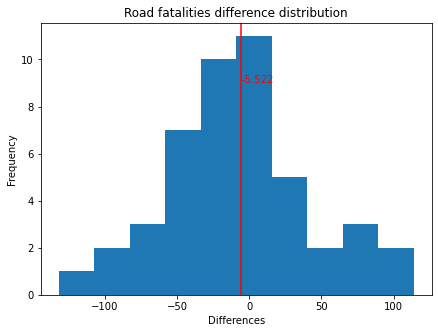

In [23]:
df2 = pd.read_csv('us-road-fatalities2.csv')

differences2 = df2['Difference']
fig = plt.figure(figsize=(7,5))
plt.hist(differences2, bins=10)
plt.axvline(x=np.mean(differences2), c='r')
plt.text(np.mean(differences2),9, round(np.mean(differences2),3),c='r')
plt.title('Road fatalities difference distribution')
plt.xlabel('Differences')
plt.ylabel('Frequency')

The graph returns a difference of means value of -5.52, indicating that each state on average saw a decrease of 5.52 road fatalities in 1988 compared to the previous year. As we can see from the visualisation below, there is significant overlap in the distributions of fatalities for each year.

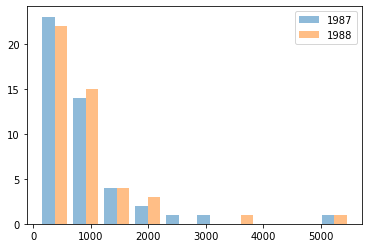

In [66]:
x = df2['1987']
y = df2['1988']

plt.hist([x,y], alpha=0.5, label=['1987','1988'])
plt.legend(loc='upper right')
plt.show()

Finally I will perform the paired samples t-test using SciPy.stats' ttest_rel() function, which takes the data for each year as arguments and returns the t-value and p-value. The **null hypothesis** for the test will be that there is no statistically significant difference between the means of the two years at the 95% confidence level, while the **alternative hypothesis** will be that there is a statistically significant difference. The result will be determined by the p-value.

In [30]:
year1 = df2['1987']
year2 = df2['1988']

result = ss.ttest_rel(year1, year2)

print("t-value:\t" + str(result.statistic))

print("p-value:\t" + str(result.pvalue))


t-value:	-0.7131880837548321
p-value:	0.47941175306041695


Because the p-value is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis.

***

### References

* SciPy stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html
* Fatalities dataset source: https://vincentarelbundock.github.io/Rdatasets/csv/AER/Fatalities.csv
* Guide to Statistical Hypothesis Tests in Python: https://www.kaggle.com/code/shashwatwork/guide-to-statistical-hypothesis-tests-in-python
* t-test: Comparing Group Means: https://uc-r.github.io/t_test#paired